In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
df = pd.read_csv("SBIN_data.csv")
df

,Date,Open,High,Low,Close,Volume
0,03-01-2017,239.601049,241.957775,236.753338,240.484817,15963085
1,04-01-2017,241.368600,241.957774,237.833497,238.520874,11225978
2,05-01-2017,240.583016,241.466784,239.306450,240.926712,11970913
3,06-01-2017,241.564985,244.510899,241.073999,241.466782,12354302
4,09-01-2017,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,08-06-2021,432.250000,432.500000,424.000000,427.200012,31113823
1091,09-06-2021,427.500000,432.299988,418.200012,421.450012,27784834
1092,10-06-2021,424.899994,433.299988,422.399994,432.250000,27397712
1093,11-06-2021,434.850006,435.500000,425.250000,429.600006,26831924


In [3]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
1,2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2,2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
3,2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
4,2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
1091,2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
1092,2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712
1093,2021-06-11,434.850006,435.500000,425.250000,429.600006,26831924


In [5]:
data = df.drop(['Date','High','Low','Volume'], axis=1)
data.index = df.Date

In [6]:
data

,Open,Close
Date,,
2017-01-03,239.601049,240.484817
2017-01-04,241.368600,238.520874
2017-01-05,240.583016,240.926712
2017-01-06,241.564985,241.466782
2017-01-09,241.957764,242.596054
...,...,...
2021-06-08,432.250000,427.200012
2021-06-09,427.500000,421.450012
2021-06-10,424.899994,432.250000


In [7]:
data.index[0]

Timestamp('2017-01-03 00:00:00')

In [10]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [11]:
train_df.shape, valid_df.shape

((1050, 2), (45, 2))

In [37]:
data.shape

(1095, 2)

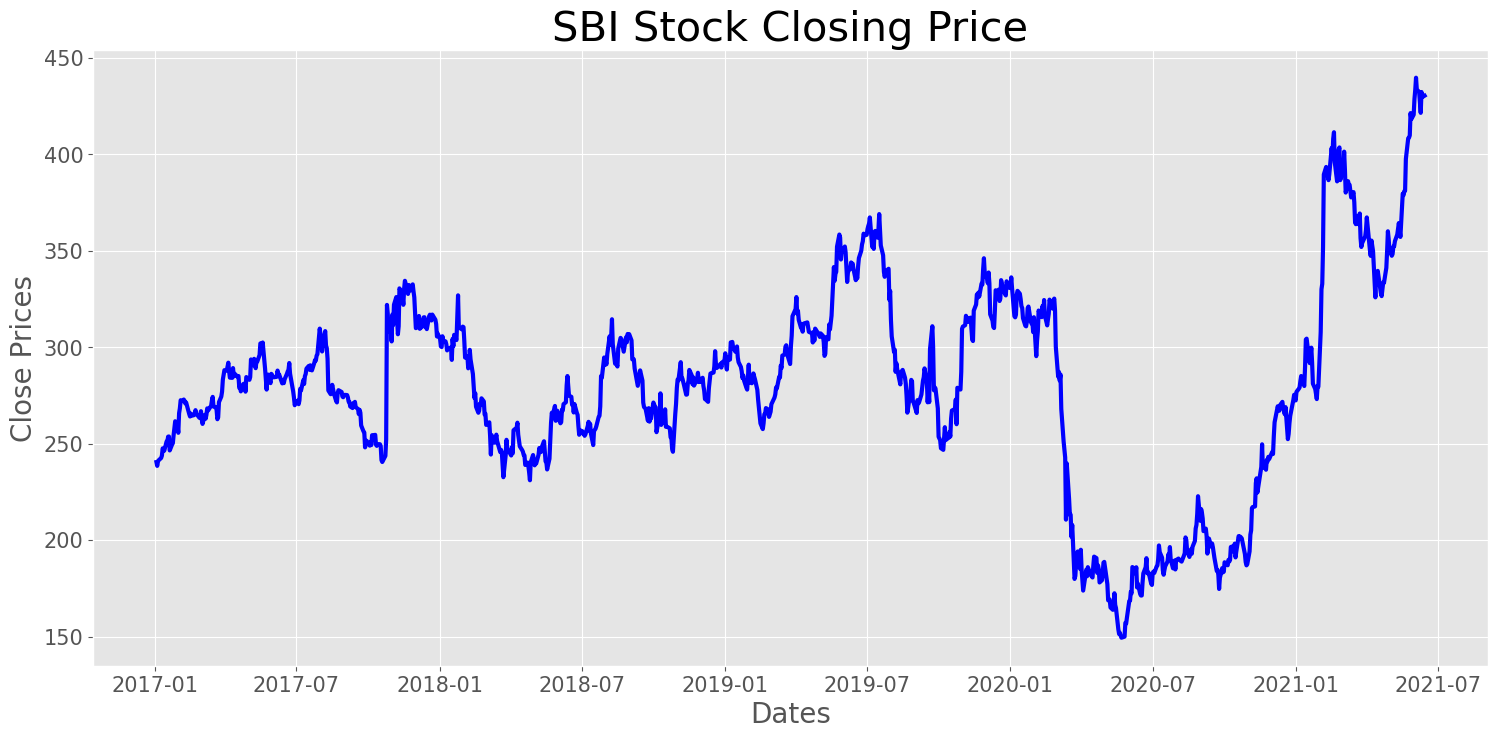

In [38]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(data['Close'], linewidth = 3, color = 'blue')
plt.title('SBI Stock Closing Price', fontsize = 30)
plt.show()

In [39]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller

In [40]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

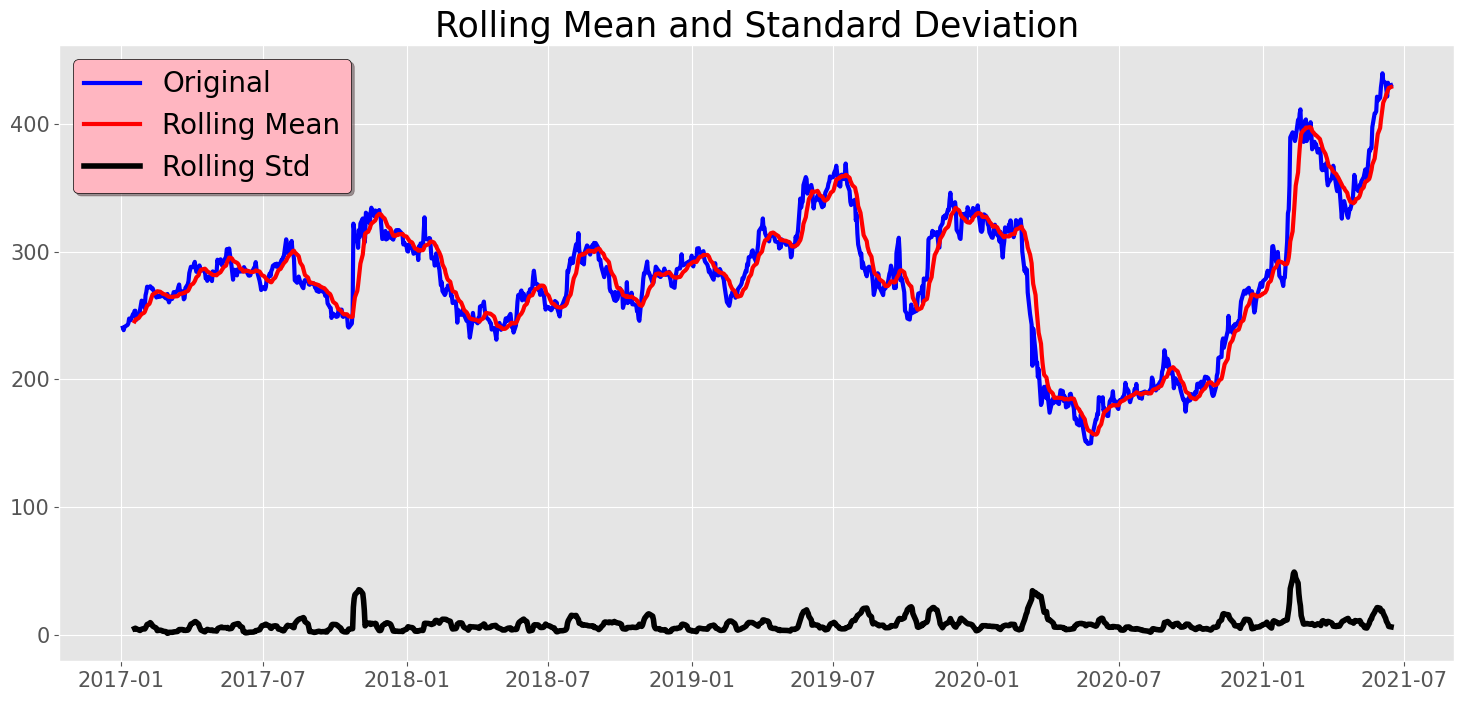

Results of dickey fuller test
Test Statistics                  -2.016912
p-value                           0.279207
No. of lags used                 17.000000
Number of observations used    1077.000000
critical value (1%)              -3.436436
critical value (5%)              -2.864227
critical value (10%)             -2.568201
dtype: float64


In [41]:
test_stationarity(data['Close'])

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data[["Close"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

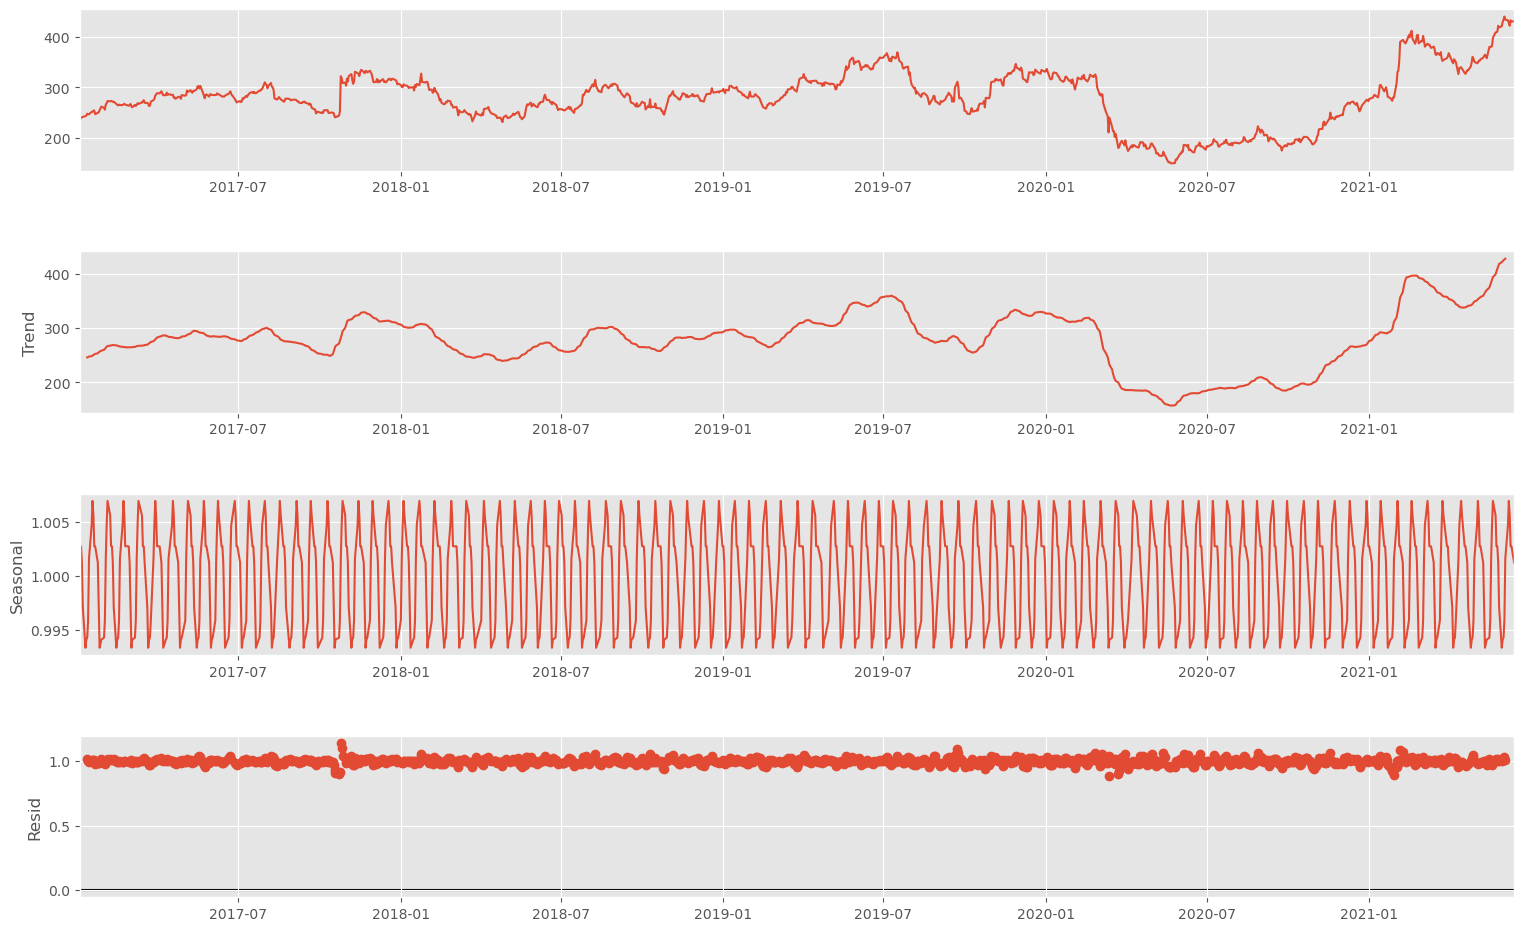

In [43]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


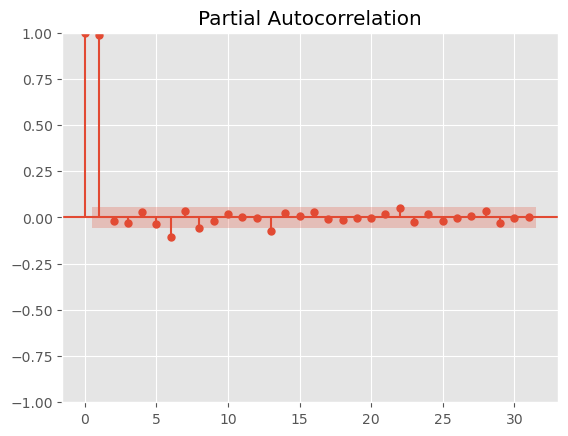

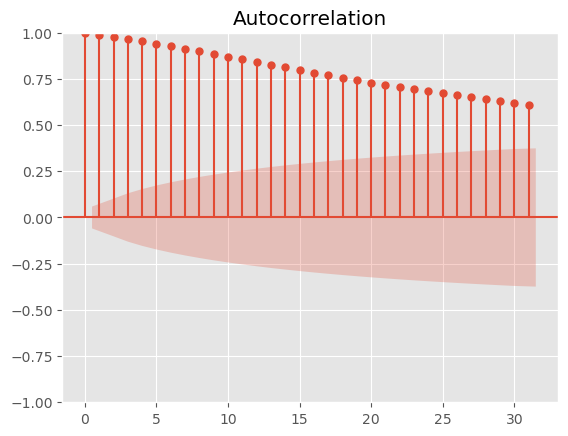

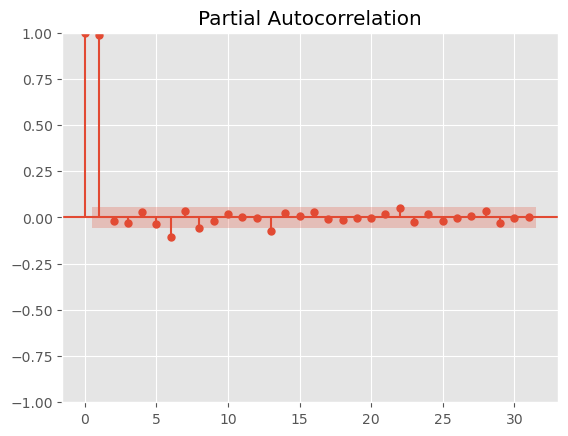

In [45]:
plot_acf(data.Close)
plot_pacf(data.Close)

In [46]:
df_close=data['Close']

In [47]:
df_close

Date
2017-01-03    240.484817
2017-01-04    238.520874
2017-01-05    240.926712
2017-01-06    241.466782
2017-01-09    242.596054
                 ...    
2021-06-08    427.200012
2021-06-09    421.450012
2021-06-10    432.250000
2021-06-11    429.600006
2021-06-14    430.350006
Name: Close, Length: 1095, dtype: float64

In [49]:
df_close_diff1=df_close.diff()
df_close_diff1.dropna(inplace=True)

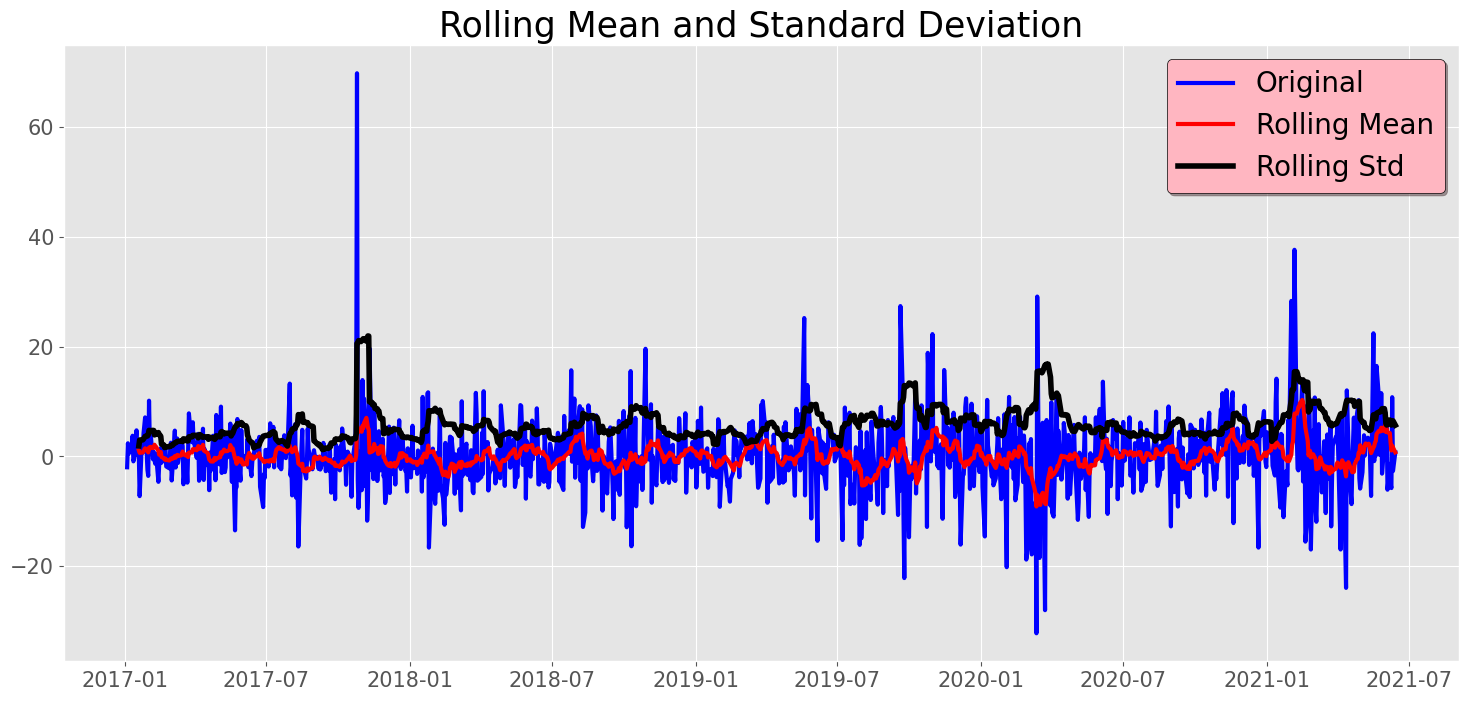

Results of dickey fuller test
Test Statistics               -1.118424e+01
p-value                        2.457613e-20
No. of lags used               6.000000e+00
Number of observations used    1.087000e+03
critical value (1%)           -3.436380e+00
critical value (5%)           -2.864203e+00
critical value (10%)          -2.568188e+00
dtype: float64


In [50]:
test_stationarity(df_close_diff1)

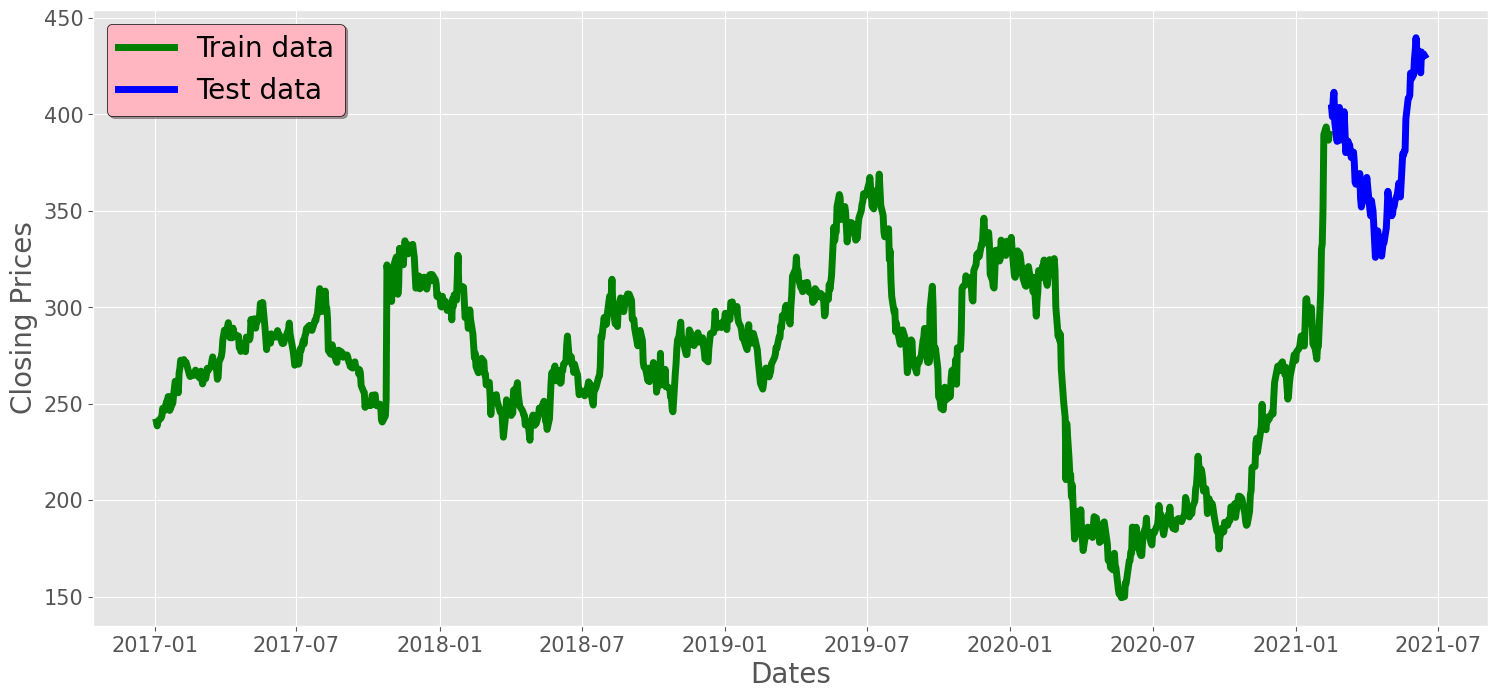

In [52]:
#split data into train and test data
train_data=df_close[0:-80]
test_data=df_close[-80:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [55]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset=dataset.astype('float32')
    best_score, best_cfg=float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=train_arima_model(dataset, test, order)
                    if rmse<best_score:
                        best_score, best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' %(best_cfg,best_score))

In [56]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=107.505
ARIMA(0, 0, 1) RMSE=58.203
ARIMA(0, 0, 2) RMSE=36.339
ARIMA(0, 1, 0) RMSE=7.921
ARIMA(0, 1, 1) RMSE=7.933
ARIMA(0, 1, 2) RMSE=7.976
ARIMA(0, 2, 0) RMSE=11.468
ARIMA(0, 2, 1) RMSE=7.995
ARIMA(0, 2, 2) RMSE=8.001
ARIMA(1, 0, 0) RMSE=7.990
ARIMA(1, 0, 1) RMSE=8.005
ARIMA(1, 0, 2) RMSE=8.058
ARIMA(1, 1, 0) RMSE=7.934
ARIMA(1, 1, 1) RMSE=7.924
ARIMA(1, 1, 2) RMSE=7.947
ARIMA(1, 2, 0) RMSE=10.176
ARIMA(1, 2, 1) RMSE=8.001
ARIMA(1, 2, 2) RMSE=7.999
ARIMA(2, 0, 0) RMSE=8.000
ARIMA(2, 0, 1) RMSE=8.000
ARIMA(2, 0, 2) RMSE=8.059
ARIMA(2, 1, 0) RMSE=7.975
ARIMA(2, 1, 1) RMSE=7.979
ARIMA(2, 1, 2) RMSE=7.900
ARIMA(2, 2, 0) RMSE=9.587
ARIMA(2, 2, 1) RMSE=8.035
ARIMA(2, 2, 2) RMSE=8.010
Best ARIMA(2, 1, 2) RMSE=7.900


In [58]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,1,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 7.914088295010613


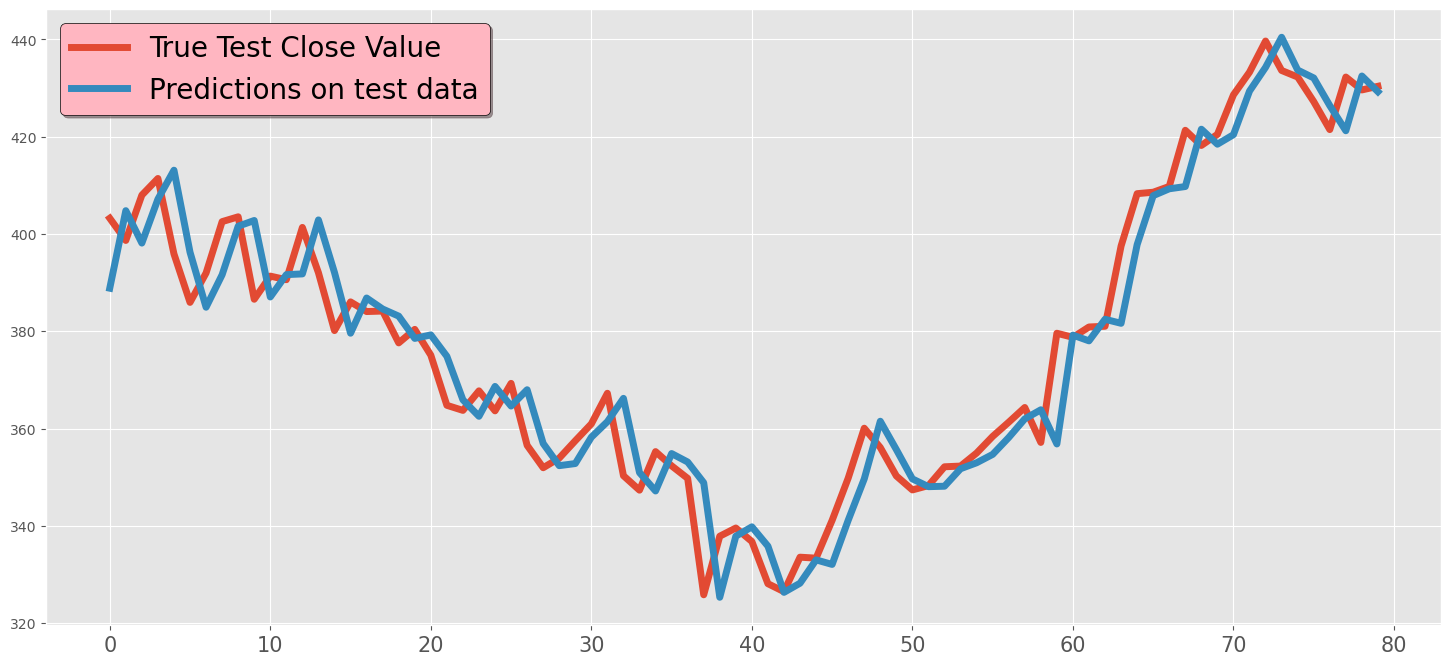

In [59]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [60]:
fc_series = pd.Series(predictions, index=test_data.index)

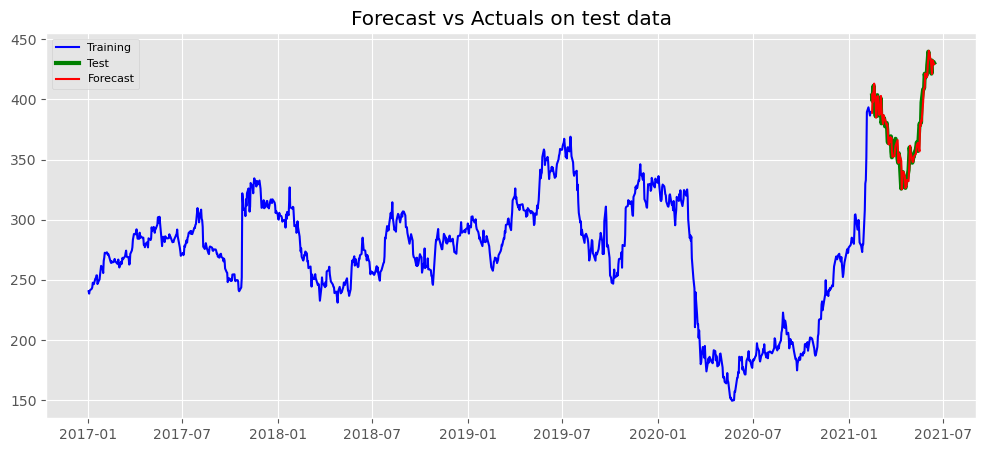

In [61]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

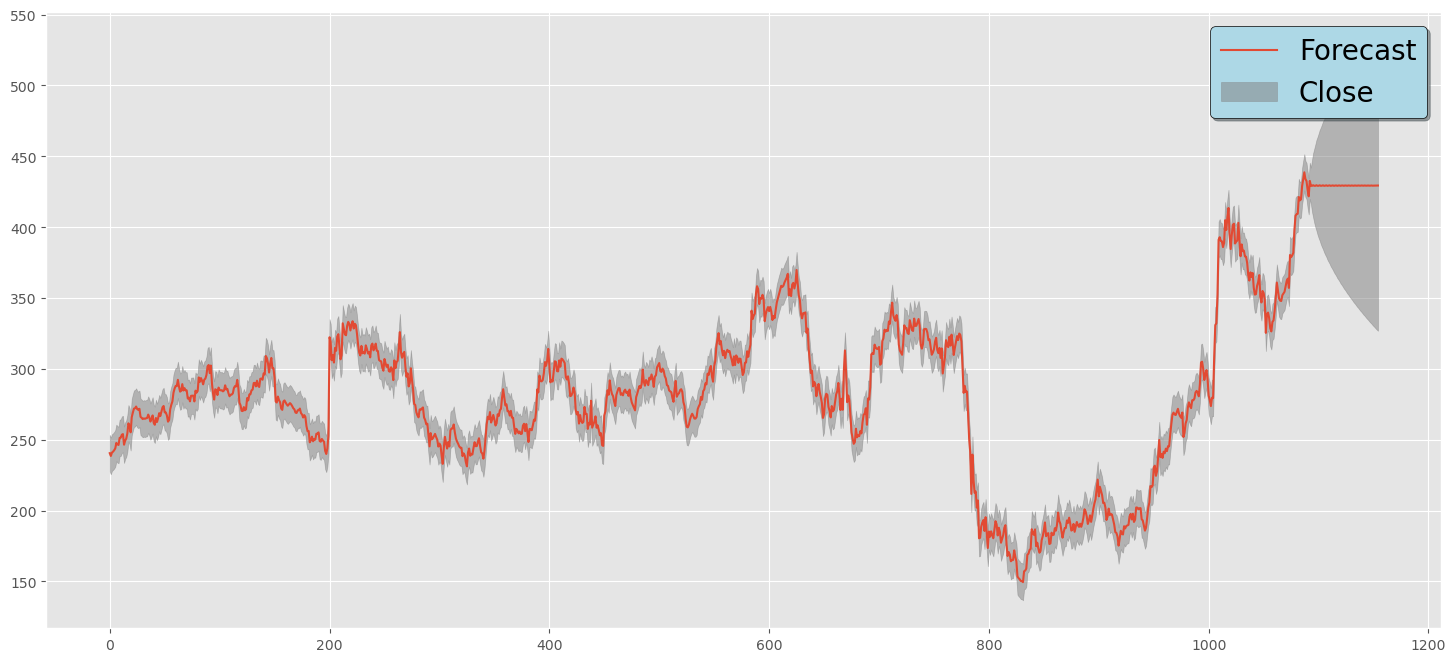

In [70]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()